# North Macedonian 2024 Election Sentiment Analysis
---
This notebook performs sentiment analysis on the Social Media posts during the 2024 North Macedonian Elections.

##### Libraries

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio

In [4]:
text = """Himni dhe simbolet shtetërore kanë vendin dhe kohën e vet se ku përdoren dhe nuk duhet të shërbejnë për t’i bërë karshillëk askujt. 
Propozimi i kreut të VMRO-DPMNE Hristijan Mickoski që të obligon fëmijët çdo të hënë të këndojnë himnin shtetëror pasqyron mendësinë nacionaliste të VMRO-DPMNE për të ushqyer fëmijët me nacionalizëm dhe me këtë të motivohet politika e tyre drejt izolim shoqëror dhe shtetëror. 
Kam një propozim më kreativ se çka duhet të dëgjojnë fëmijët në këtë shtet dhe atë jo çdo të hënë por çdo ditë:
- të dëgjojnë se si VMRO-DPMNE shet nacionalizëm të rrejshëm ndërsa bën argatin e agjendave anti-evropiane!
- se si VMRO-DPMNE nxit urrejtje dhe ndasi!
-se si VMRO-DPMNE po bllokon të ardhmen evropiane të gjeneratave të reja!
-se si VMRO-DPMNE po izolon shtetin!
- se si VMRO-DPMNE ushtron pushtetin kundër kombit shqiptar në komunat që udhëheqin kuadrot e saj!
Me qasje të këtij lloji, shteti rrezikon shumë prandaj është i nevojshëm një bllok më i madh me orientim të qartë për të ardhmen evropiane të vendit."""

In [13]:
from googletrans import Translator
import nest_asyncio

nest_asyncio.apply()  # Not needed here but safe in Jupyter

# Create a translator instance
translator = Translator()

# Define the text to translate
text = "Здраво, како си?"

# Translate the text (synchronous call)
text_translated = translator.translate(text, src='auto', dest='en')

# Print the translated text
print(text_translated.text)

# Store it if needed
translated_text = text_translated.text


Hi, how are you?


In [14]:
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(translated_text)
print("Sentiment Analysis Results:")
print(f"Negative: {sentiment['neg']}")
print(f"Neutral: {sentiment['neu']}")
print(f"Positive: {sentiment['pos']}")
print(f"Compound: {sentiment['compound']}")

Sentiment Analysis Results:
Negative: 0.0
Neutral: 1.0
Positive: 0.0
Compound: 0.0


In [16]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nest_asyncio
import asyncio

nest_asyncio.apply()

translator = Translator()
analyzer = SentimentIntensityAnalyzer()

# Load dataset
df = pd.read_csv('PreprocessedDataset/VMRO-DPMNE_claims.csv')

# Clean claims
df['claims'] = df['claims'].astype(str).str.strip("[]").str.replace('"', '', regex=False).str.replace("'", '', regex=False).str.strip()

# Translate and analyze (async version)
async def process_row(text):
    try:
        translated = await translator.translate(text, src='auto', dest='en')
        sentiment = analyzer.polarity_scores(translated.text)
        return translated.text, sentiment['compound'], sentiment['pos'], sentiment['neu'], sentiment['neg']
    except:
        return '', 0.0, 0.0, 0.0, 0.0

async def process_all(df):
    results = []
    for row in df['claims']:
        result = await process_row(row)
        results.append(result)
    return results

# Run async loop
translated_sentiments = await process_all(df)

# Unpack results
df[['translated_claim', 'compound', 'pos', 'neu', 'neg']] = pd.DataFrame(translated_sentiments, index=df.index)

# Add label
df['sentiment_label'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')


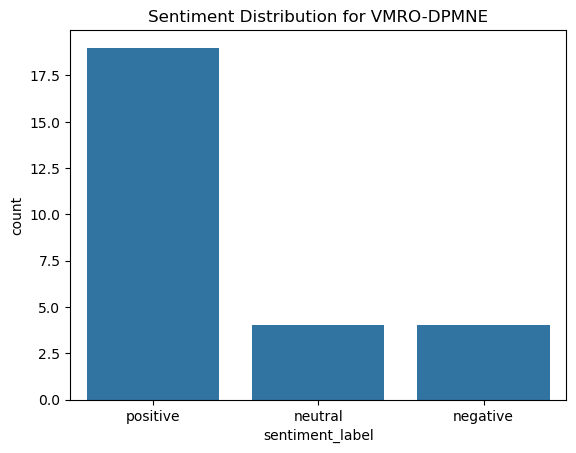

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("sentiment_combined.csv")

sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution for VMRO-DPMNE")
plt.show()
